In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import datetime
import gc
import scipy.stats as stats
import missingno as msno

In [2]:
com=pd.read_csv("C:\Datasets\Ecommerce.csv")
com.head() #Reading the data 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Problem Statements:

# 1. Perform Basic EDA
a. Boxplot – All Numeric Variables

In [3]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


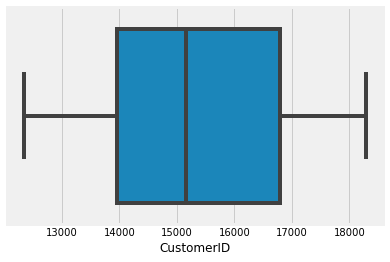

In [4]:
sns.boxplot("CustomerID",data=com)
plt.rcParams['figure.figsize'] = (10,6)
plt.show()

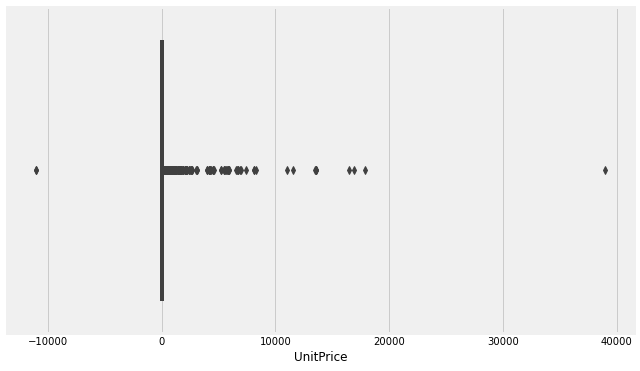

In [5]:
sns.boxplot("UnitPrice",data=com)
plt.rcParams['figure.figsize'] = (10,6)
plt.show()

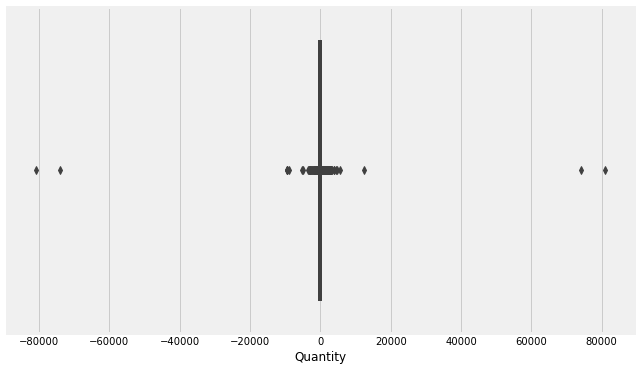

In [6]:
sns.boxplot("Quantity",data=com)
plt.rcParams['figure.figsize'] = (10,6)
plt.show()

# b. Histogram – All Numeric Variables


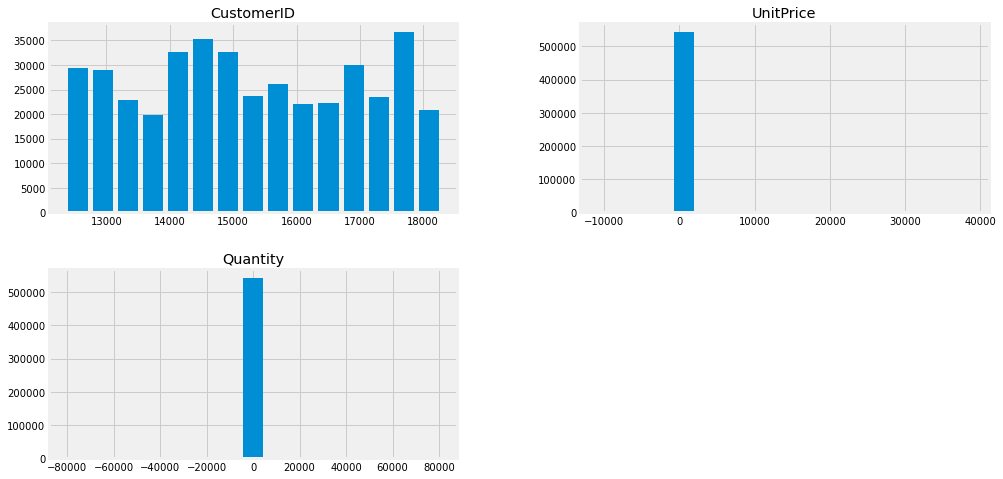

In [7]:
com[["CustomerID","UnitPrice","Quantity"]].hist(bins=15,figsize=(15,8),rwidth=0.8)
plt.show()

# c. Distribution Plot – All Numeric Variables

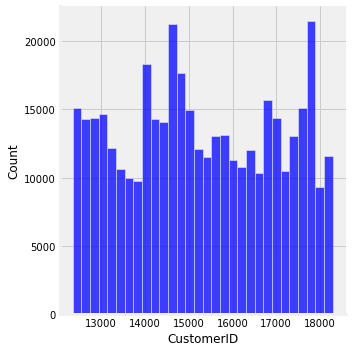

In [8]:
sns.displot(com["CustomerID"],kde=False,color='blue',bins=30)
plt.rcParams['figure.figsize'] = (10,6)
plt.show()

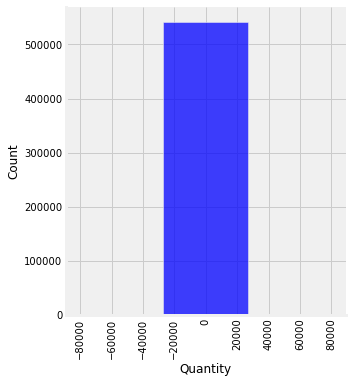

In [9]:
sns.displot(com["Quantity"],kde=False,color='blue',bins=3)
plt.xticks(rotation=90)
plt.show()

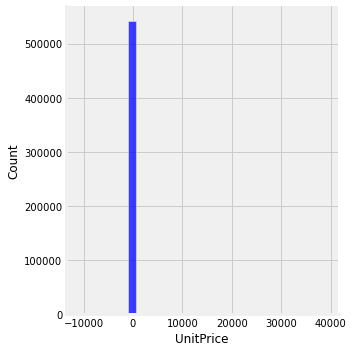

In [10]:
sns.displot(com["UnitPrice"],kde=False,color='blue',bins=30)
plt.rcParams['figure.figsize'] = (10,6)
plt.show()


# d. Aggregation for all numerical Columns


In [11]:
com.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# e. Unique Values across all columns


In [12]:
column_values=com[["CustomerID","InvoiceNo","StockCode","UnitPrice","Quantity","InvoiceDate","Country","Description"]].values.ravel()
unique_values=pd.unique(column_values).tolist()

In [13]:
unique_values
list1=[unique_values]
df=pd.DataFrame(list1) #converting into dataframe

# f. Duplicate values across all columns

In [14]:
duplicate=com[com.duplicated(["CustomerID","InvoiceNo","StockCode","UnitPrice","Quantity","InvoiceDate","Country","Description"])]
duplicate.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom


# g. Correlation – Heatmap - All Numeric Variables


In [15]:
pd.DataFrame(com.corr())

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


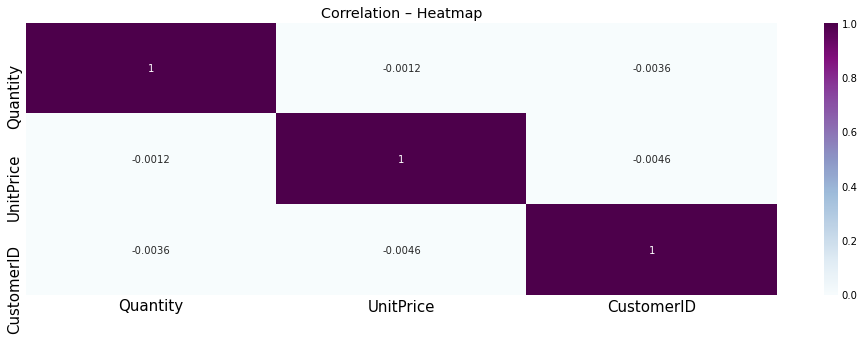

In [16]:
plt.figure(figsize=(15,5))
sns.heatmap(com.corr(),annot=True,cmap='BuPu')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Correlation – Heatmap")
plt.show()

# h. Regression Plot - All Numeric Variables


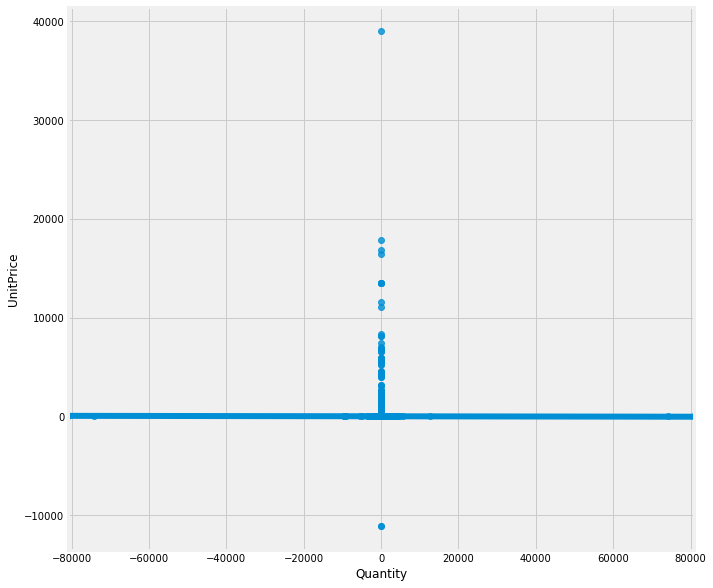

In [17]:
fig,ax=plt.subplots(nrows=1,figsize=(10,10))
sns.regplot(com["Quantity"],com["UnitPrice"])
plt.show()

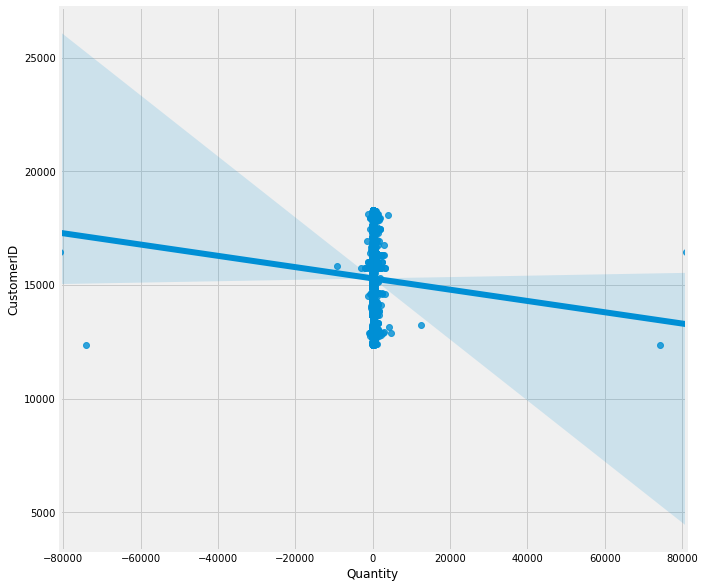

In [18]:
fig,ax=plt.subplots(nrows=1,figsize=(10,10))
sns.regplot(com["Quantity"],com["CustomerID"])
plt.show()

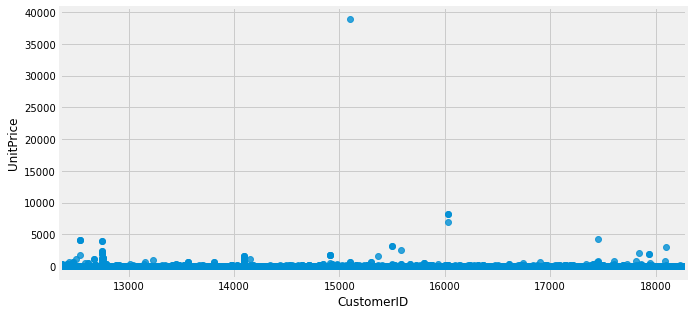

In [19]:
fig,ax=plt.subplots(nrows=1,figsize=(10,5))
sns.regplot(com["CustomerID"],com["UnitPrice"])
plt.show()

# i. Bar Plot – Every Categorical Variable vs every Numerical Variable


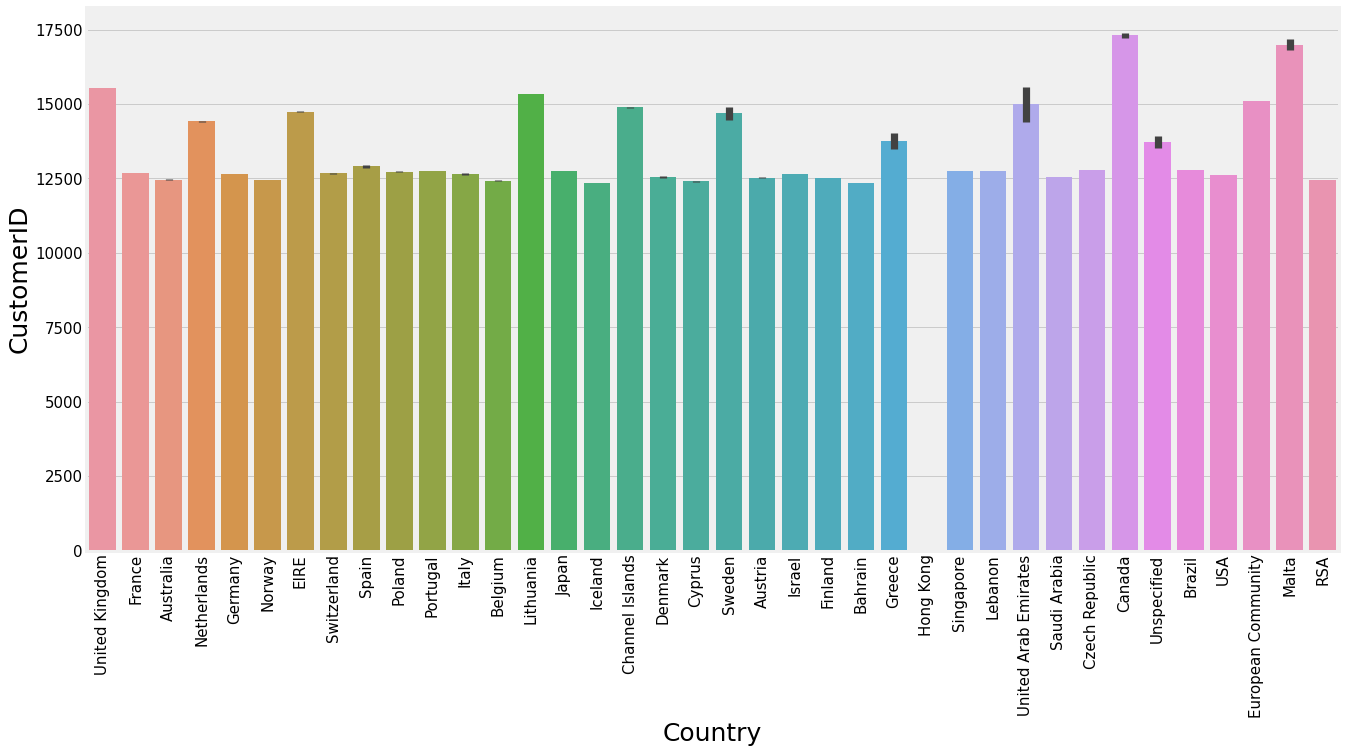

In [20]:
plt.figure(figsize=(20,10))
sns.barplot(x="Country",y="CustomerID",data=com)
plt.xticks(rotation=90,fontsize=(15))
plt.yticks(fontsize=(15))
plt.xlabel("Country",fontsize=(25))
plt.ylabel("CustomerID",fontsize=(25))
plt.show()

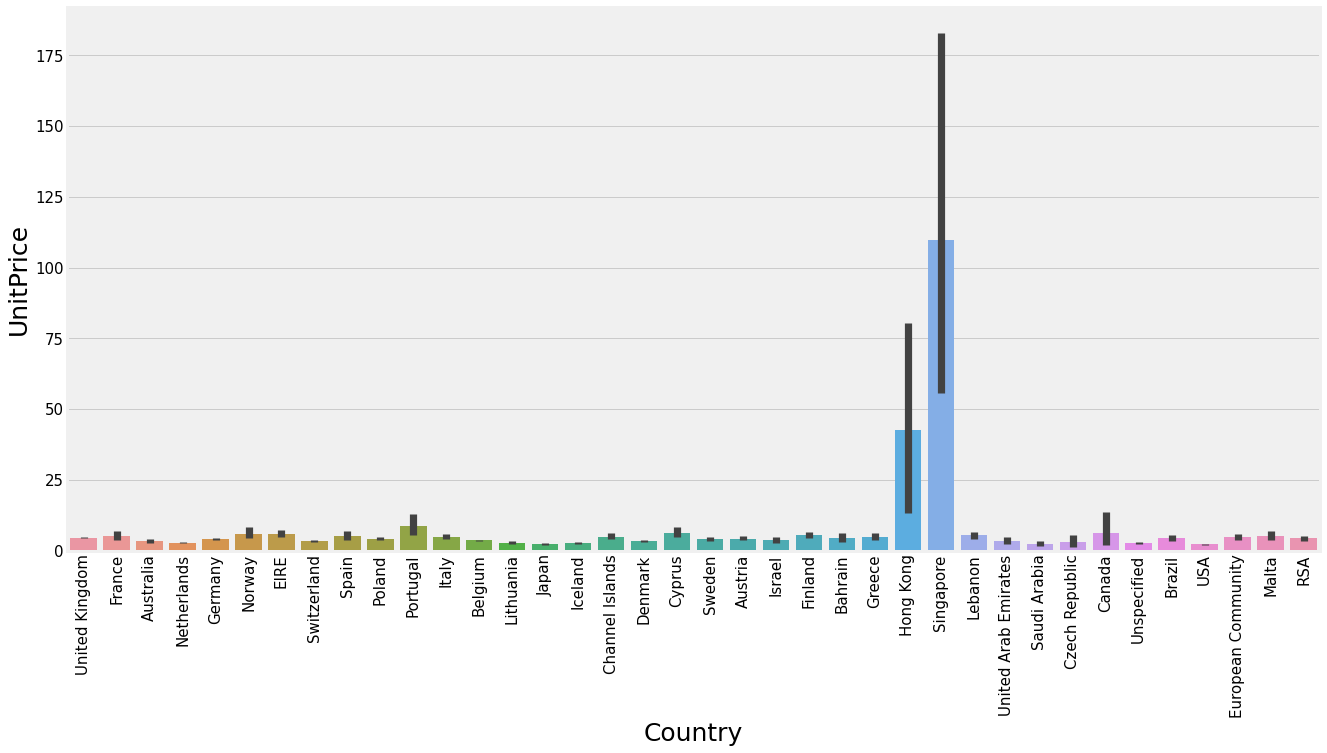

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(x="Country",y="UnitPrice",data=com)
plt.xticks(rotation=90,fontsize=(15))
plt.yticks(fontsize=(15))
plt.xlabel("Country",fontsize=(25))
plt.ylabel("UnitPrice",fontsize=(25))
plt.show()

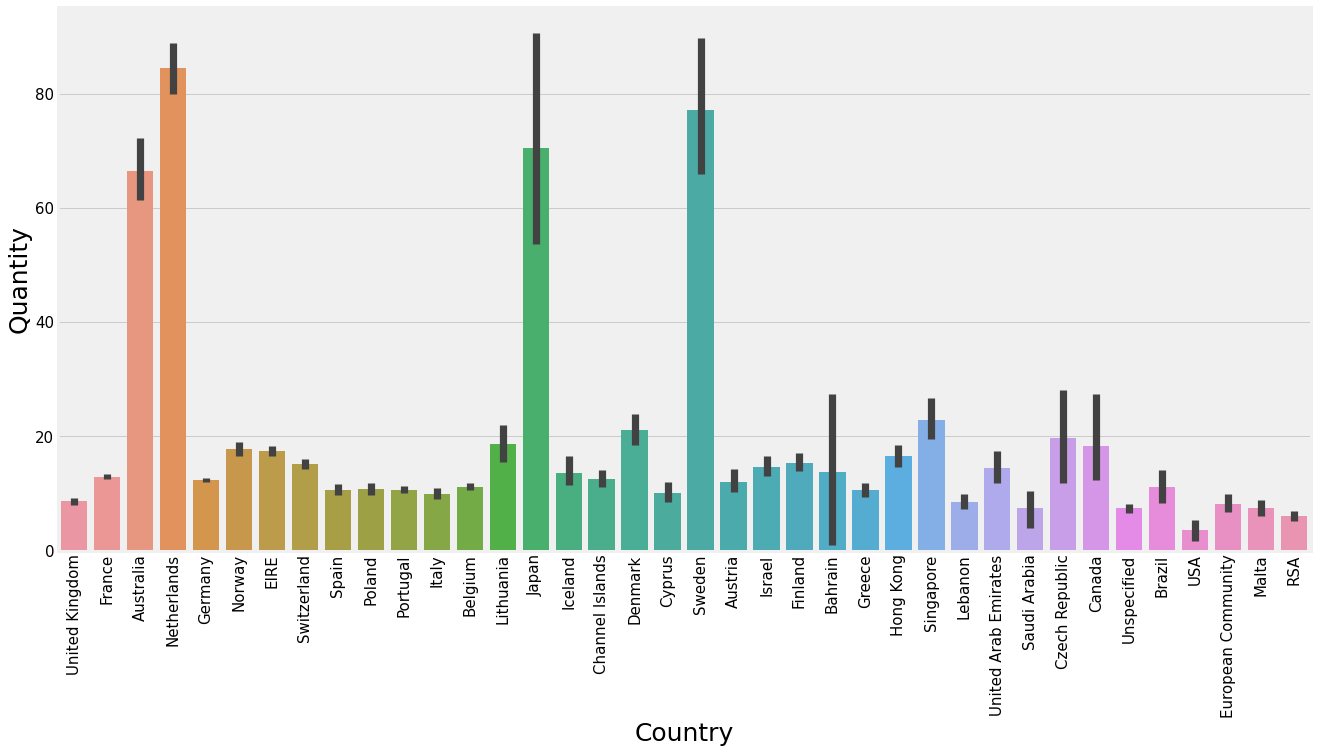

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x="Country",y="Quantity",data=com)
plt.xticks(rotation=90,fontsize=(15))
plt.yticks(fontsize=(15))
plt.xlabel("Country",fontsize=(25))
plt.ylabel("Quantity",fontsize=(25))
plt.show()

# j. Pair plot - All Numeric Variables


In [ ]:
sns.pairplot(com,vars=["CustomerID","UnitPrice","Quantity"])
plt.show()

# k. Line chart to show the trend of data - All Numeric/Date Variables


In [ ]:
com["InvoiceDate"]=pd.to_datetime(com["InvoiceDate"])
com["InvoiceDate"].plot(figsize=(12,6))
plt.xlabel("No of Orders",fontsize=25)
plt.ylabel("InvoiceDate",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
com["Quantity"].plot(figsize=(12,6))
plt.xlabel("Quantity",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
com["UnitPrice"].plot(figsize=(12,6))
plt.xlabel("UnitPrice",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# l. Plot the skewness - All Numeric Variables

In [ ]:
com.skew()

# Arranging the columns

In [ ]:
com=com[["CustomerID","InvoiceNo","StockCode","UnitPrice","Quantity","InvoiceDate","Country","Description"]]
com.head()

In [ ]:
msno.bar(com)

In [ ]:
com.isnull().sum().sort_values() #Checking the null values

# 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode)

In [ ]:
com["Description"].fillna(com["Description"].mode()[0],inplace=True)

In [ ]:
com["CustomerID"].fillna(com["CustomerID"].mode().iloc[0],inplace=True)

# 3. Remove duplicate rows

In [ ]:
pd.DataFrame(com.drop_duplicates(inplace=True))

# 4. Dropping Negative Values from  quantity column

In [ ]:
com=com.loc[com["Quantity"]>0]
com['Quantity'].astype(float)

In [ ]:
com.info()

# 5. Add the columns - Month, Day and Hour for the invoice

In [ ]:
com["InvoiceDate"]=pd.to_datetime(com["InvoiceDate"])

In [ ]:
Year=com.insert(loc=7,column="Year",value=com["InvoiceDate"].dt.year)

In [ ]:
Month=com.insert(loc=8,column="Month",value=com["InvoiceDate"].dt.month)

In [ ]:
Day=com.insert(loc=9,column="Day",value=com["InvoiceDate"].dt.day)

In [ ]:
Hour=com.insert(loc=10,column="Hour",value=com["InvoiceDate"].dt.hour)

In [ ]:
com.head()

In [ ]:
com.info()

# 6. How many orders made by the customers?

In [ ]:
Orders=pd.DataFrame(com.groupby(by=["CustomerID"],as_index=False)["InvoiceNo"].nunique())
Orders.InvoiceNo.sum() #Total number of order is 20728

# 7. TOP 5 customers with higher number of orders

In [ ]:
Top5=pd.DataFrame(com.groupby(by=["CustomerID"])["InvoiceNo"].nunique())
Top5.sort_values(by="InvoiceNo",ascending=False).head()


In [ ]:
Top5.plot(figsize=(20,10))

# 8. How much money spent by the customers?

In [ ]:
Total_Price=com["UnitPrice"]*com["Quantity"]
Total_Price=Total_Price.astype(float)
com.insert(loc=5,column="Total_Price",value=Total_Price,allow_duplicates = False)

In [ ]:
com.dropna(axis="rows",how="any",inplace=True)

In [ ]:
Amount_spent=round(Total_Price.sum(),2)
Amount_spent #The amount of money spent by customers is 10619986.68

# 9. TOP 5 customers with highest money spent

In [ ]:
Total_Price.sort_values(ascending=False).head()
com["Total_Price"].rank(ascending= False).sort_index()
com.sort_values('Total_Price', ascending= False).head()

# 10. How many orders per month?

In [ ]:
com.groupby("Month")["InvoiceNo"].nunique()

In [ ]:
com.groupby("Month")["InvoiceNo"].nunique().plot(kind="bar",figsize=(20,10))
plt.xlabel("Month",fontsize=25)
plt.ylabel("No of Orders",fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

# 11. How many orders per day?

In [ ]:
com.groupby("Day")["InvoiceNo"].nunique()

In [ ]:
com.groupby("Day")["InvoiceNo"].nunique().plot(kind="bar",figsize=(20,10))
plt.xlabel("Day",fontsize=25)
plt.ylabel("No of Orders",fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

# 12. How many orders per hour?

In [ ]:
com.groupby("Hour")["InvoiceNo"].nunique()

In [ ]:
com.groupby("Hour")["InvoiceNo"].nunique().plot(kind="bar",figsize=(20,10))
plt.xlabel("Hour",fontsize=25)
plt.ylabel("No of Orders",fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

# 13. How many orders for each country?


In [ ]:
com.groupby("Country")["InvoiceNo"].count()

In [ ]:
Order_per_country=com.groupby("Country")["InvoiceNo"].count().sort_values(ascending=False).plot(kind='bar',figsize=(20,10))
plt.xlabel("Country",fontsize=25)
plt.ylabel("No of Orders",fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

# 14. Orders trend across months

In [ ]:
com.groupby("Month")['InvoiceNo'].nunique().plot(kind='line',marker='o',figsize=(20,10))
plt.xlabel("Month",fontsize=25)
plt.ylabel("No of Orders",fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=15)
plt.show()

# 15. How much money spent by each country?

In [ ]:
com.groupby('Country')['Total_Price'].sum().sort_values(ascending=False).plot(kind='barh',figsize=(20,15))
plt.xlabel("Country",fontsize=25)
plt.ylabel("Total_Price",fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=15)
plt.show()